# 3D Plotting in Matplotlib

## Overview
Matplotlib supports 3D plotting via **mplot3d** (Axes3D). This notebook covers 3D scatter, lines, surfaces, wireframes, and 3D contours with professional styling.

### What you'll learn
- Create 3D axes and control viewpoint
- 3D scatter (color/size = extra dimensions)
- 3D line plots and parametric curves
- 3D surfaces and wireframes
- 3D contour projections and 3D bars
- Best practices (aspect, viewpoint, colorbars, performance)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete (3D plotting ready).')

✅ Setup complete (3D plotting ready).


## 1. Creating 3D Axes

```python
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Viewpoint controls
ax.view_init(elev=20, azim=45)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
```

### Viewpoint tips
- **elev** rotates up/down (pitch).
- **azim** rotates around z-axis (yaw).
- Use multiple angles to confirm patterns are real (not viewpoint artifacts).


=== 3D AXES VIEWPOINT DEMO ===


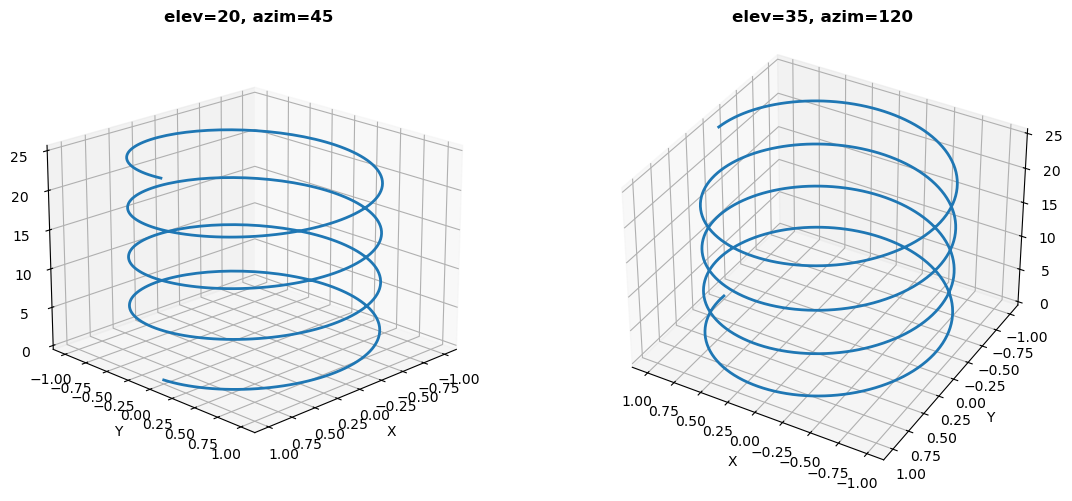

In [2]:
print('=== 3D AXES VIEWPOINT DEMO ===')
fig = plt.figure(figsize=(12, 5))

for i, (elev, azim) in enumerate([(20, 45), (35, 120)], start=1):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    t = np.linspace(0, 8*np.pi, 500)
    x = np.cos(t)
    y = np.sin(t)
    z = t
    ax.plot(x, y, z, lw=2)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f'elev={elev}, azim={azim}', fontweight='bold')
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

## 2. 3D Scatter (with color & size)

3D scatter is ideal when you have (x, y, z) points. You can encode a 4th dimension using color and a 5th using marker size.

```python
sc = ax.scatter(x, y, z, c=values, s=sizes, cmap='viridis', alpha=0.8)
plt.colorbar(sc, ax=ax, label='4th dimension')
```


=== 3D SCATTER (4D/5D ENCODING) ===


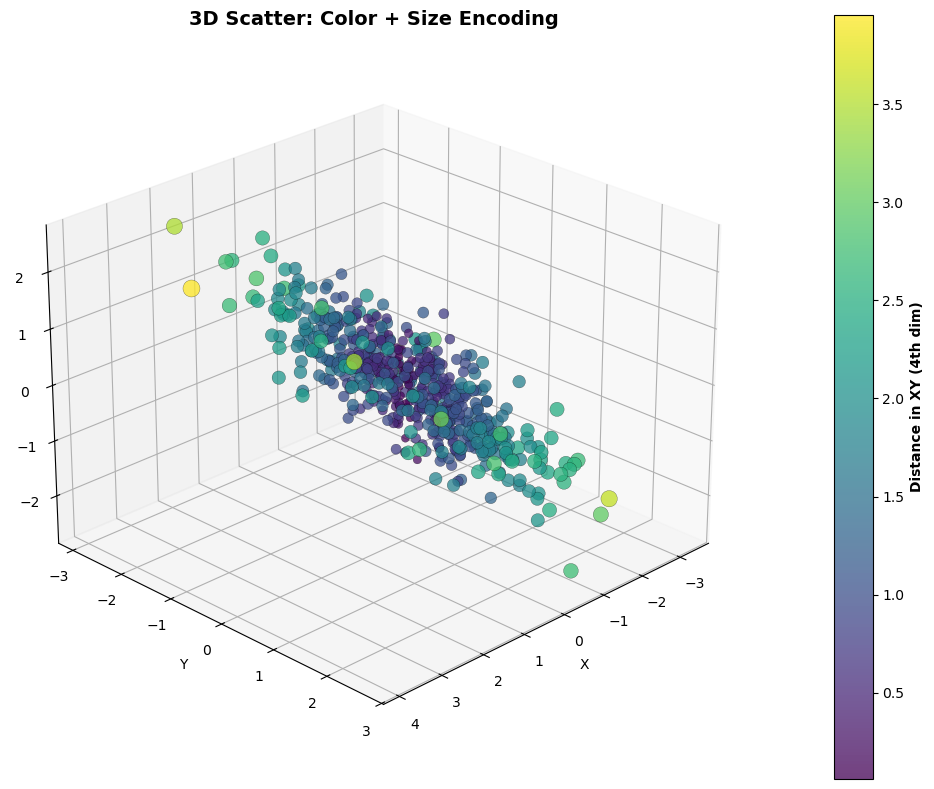

In [3]:
print('=== 3D SCATTER (4D/5D ENCODING) ===')
n = 600
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
z = 0.6*x - 0.3*y + np.random.normal(0, 0.5, n)
val = np.sqrt(x**2 + y**2)  # 4th dimension
sizes = 30 + 120 * (val / val.max())

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=val, s=sizes, cmap='viridis', alpha=0.75, edgecolor='k', linewidth=0.2)
ax.set_title('3D Scatter: Color + Size Encoding', fontsize=14, fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(elev=25, azim=45)
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Distance in XY (4th dim)', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. 3D Surfaces & Wireframes

Use surfaces for continuous functions \(z=f(x,y)\). Wireframes emphasize structure and are lighter.

```python
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
plt.colorbar(surf, ax=ax)

ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
```

### Performance tips
- Reduce grid resolution (e.g., 50×50 instead of 200×200).
- Use `edgecolor='none'` for faster surfaces.
- Wireframes are faster than surfaces for large grids.


=== 3D SURFACE + WIREFRAME ===


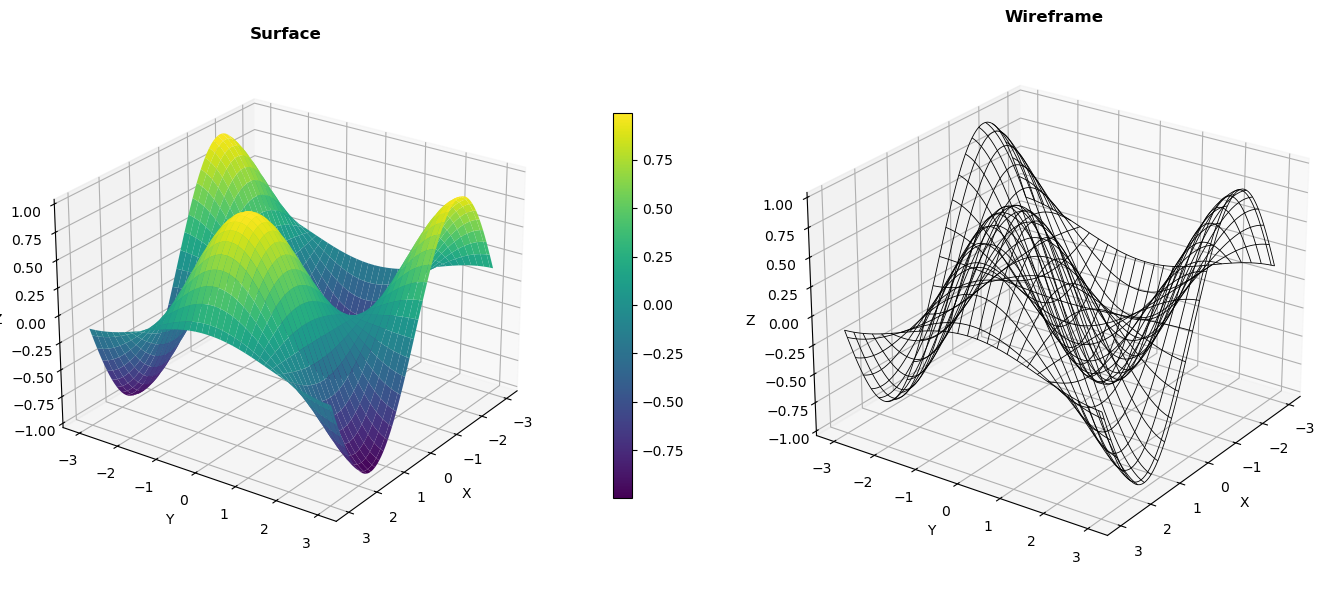

In [4]:
print('=== 3D SURFACE + WIREFRAME ===')
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
ax1.set_title('Surface', fontweight='bold')
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax1.view_init(elev=25, azim=35)
plt.colorbar(surf, ax=ax1, shrink=0.7, pad=0.1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='black', linewidth=0.6)
ax2.set_title('Wireframe', fontweight='bold')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.view_init(elev=25, azim=35)

plt.tight_layout()
plt.show()

## 4. 3D Contours and Projections

You can project 2D contours onto 3D planes using `ax.contour(..., zdir=..., offset=...)`.

```python
ax.contour(X, Y, Z, zdir='z', offset=-2, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-4, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset= 4, cmap='coolwarm')
```


=== 3D CONTOUR PROJECTIONS ===


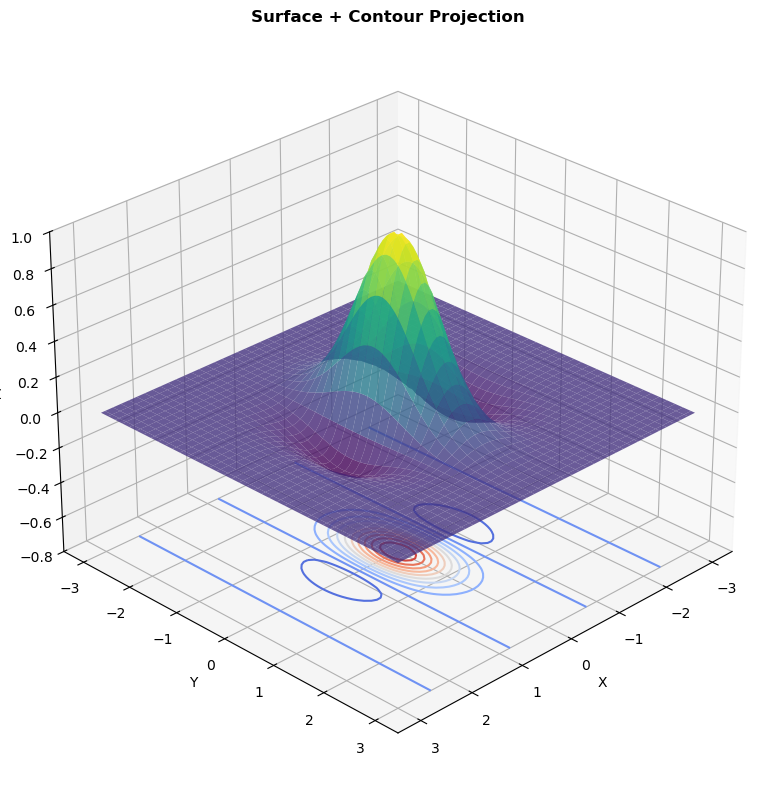

In [5]:
print('=== 3D CONTOUR PROJECTIONS ===')
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)) * np.cos(2*X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)
ax.contour(X, Y, Z, zdir='z', offset=-0.8, cmap='coolwarm', levels=12)
ax.set_zlim(-0.8, 1.0)
ax.set_title('Surface + Contour Projection', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(elev=28, azim=45)
plt.tight_layout()
plt.show()

## 5. 3D Bars (bar3d)

3D bars are useful for small grids but can be harder to read than 2D heatmaps. Use sparingly.

```python
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)
```


=== 3D BAR CHART ===


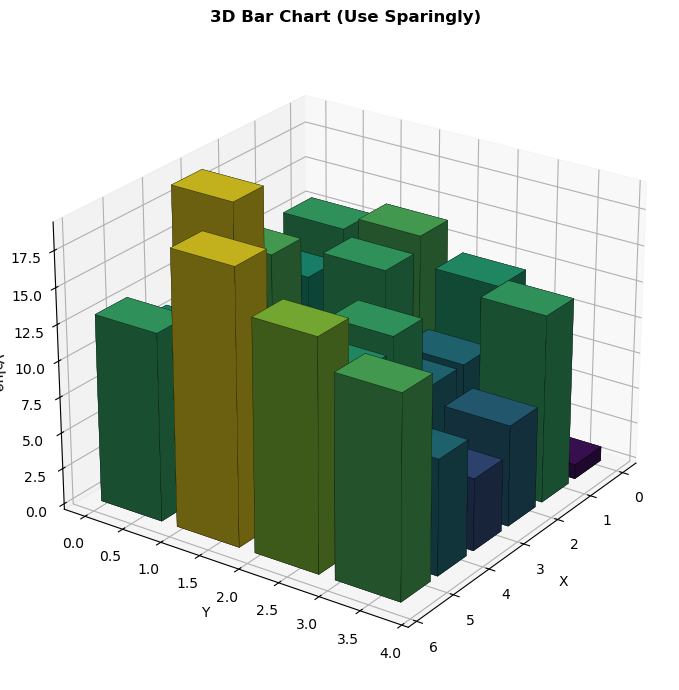

In [6]:
print('=== 3D BAR CHART ===')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Grid positions
_x = np.arange(6)
_y = np.arange(4)
xpos, ypos = np.meshgrid(_x, _y)
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = 0.8 * np.ones_like(zpos)
dy = 0.8 * np.ones_like(zpos)
dz = np.random.randint(1, 20, size=len(zpos))

colors = cm.viridis(dz / dz.max())
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, shade=True, edgecolor='k', linewidth=0.2)
ax.set_title('3D Bar Chart (Use Sparingly)', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Value')
ax.view_init(elev=25, azim=35)
plt.tight_layout()
plt.show()

## Practice Exercises

### Beginner
1. Create a 3D scatter plot of 200 random points.
2. Change viewpoint using different (elev, azim).
3. Add colorbar to 3D scatter.

### Intermediate
4. Create a 3D surface for \(z=\sin(x)\cos(y)\).
5. Plot the same surface as wireframe and compare.
6. Add contour projection to the z-plane.

### Advanced
7. Build a 2×2 dashboard: surface, wireframe, 3D scatter, 3D bars.
8. Create a parametric 3D curve (helix, torus knot).
9. Optimize performance for a dense grid (timing + reduced resolution).

## Quick Reference
```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=v, cmap='viridis')
ax.plot(x, y, z)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_wireframe(X, Y, Z)
ax.contour(X, Y, Z, zdir='z', offset=-1)
ax.view_init(elev=25, azim=45)
```
